# Information Available 
1. We have 3 Datasets having Road accident data for years, age group gender and Cause of accidents  

Problem Statement 
1. From given Dataset we want to analyse which part of india has witnessed more number of accidents between 2003 to 2016 
2. Which States has shown Dip in no of accident per year
3. Which age group had been among who had met with accident 
4. Which Gender has witnessed more accidents
5. More Accidents are due to non wearing of helmet or due to non wearing of Seat Belt

In [131]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [132]:
df1 = pd.read_csv('Road_Acc_3_to_2016.csv')
df2 = pd.read_csv('Road_Acc_Gender-Wise_and_Age_wise_2014-2016.csv')
df3 = pd.read_csv('Persons_killed_due_to_Non-use_of_Safety_Device_2016.csv')

#### df1 is Road_Acc_3_to_2016 which have details of road accident from 2003-2016 for all states and UT of india 
#### df2 is Road_Acc_Gender-Wise_and_Age_wise_2014-2016 which have details of gender and age wise road accident from 2014-2016
#### df3 is Persons_killed_due_to_Non-use_of_Safety_Device_2016 which have details of accident due to saftey ignorance 

In [133]:
df1.shape

(36, 16)

In [134]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   State/ UT  36 non-null     object 
 1   2003       35 non-null     float64
 2   2004       35 non-null     float64
 3   2005       35 non-null     float64
 4   2006       35 non-null     float64
 5   2007       35 non-null     float64
 6   2008       35 non-null     float64
 7   2009       35 non-null     float64
 8   2010       35 non-null     float64
 9   2011       35 non-null     float64
 10  2012       35 non-null     float64
 11  2013       35 non-null     float64
 12  2014       36 non-null     int64  
 13  2015       36 non-null     int64  
 14  2016       36 non-null     int64  
 15  Total_acc  36 non-null     int64  
dtypes: float64(11), int64(4), object(1)
memory usage: 4.6+ KB


#### a new dataframe created from df1 (Road_Acc_3_to_2016) and named as road_acc this dataframe is melted on column State/ UT
#### road_acc is created after droping Total_acc from df1 and melting all coulumn on State/ UT column
#### this new dataframe is created for ease of data analysis 

In [135]:
road_acc = df1.drop('Total_acc',1)
road_acc = road_acc.melt(id_vars='State/ UT')
road_acc.rename({'variable':'Year','value':'No_of_Accident'},axis = 1,inplace = True)
road_acc

C:\Users\Manish\AppData\Local\Temp\ipykernel_15048\935861598.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  road_acc = df1.drop('Total_acc',1)


,State/ UT,Year,No_of_Accident
0,Andhra Pradesh,2003,9679.0
1,Arunachal Pradesh,2003,127.0
2,Assam,2003,1122.0
3,Bihar,2003,2368.0
4,Chhattisgarh,2003,1881.0
...,...,...,...
499,Dadra & Nagar Haveli,2016,46.0
500,Daman & Diu,2016,38.0
501,Delhi,2016,1591.0
502,Lakshadweep,2016,1.0


In [136]:
df2.drop(columns=['Unnamed: 39','Unnamed: 40'],axis=1,inplace = True)
df2.head()

,State/ UT,Less than 5 years - Male - 2014,Less than 5 years - Female - 2014,6-9 Years - Male - 2014,6-9 Years - Female - 2014,10-14 Years - Male - 2014,10-14 Years - Female - 2014,15-17 Years - Male - 2014,15-17 Years - Female - 2014,18-20 Years - Male - 2014,...,25-35 - Female - 2016,35-45 - Male - 2016,35-45 - Female - 2016,45-60 - Male - 2016,45-60 - Female - 2016,60 and Above - Male - 2016,60 and Above - Female - 2016,Age not known - Male - 2016,Age not known - Female - 2016,Total_acc
0,Andhra Pradesh,0,0,0,0,111,30,190,81,498,...,241,2079,244,1278,174,458,93,121,36,16449
1,Arunachal Pradesh,0,0,0,0,0,0,17,5,23,...,3,25,4,14,1,0,0,2,0,268
2,Assam,15,8,42,24,91,28,130,21,391,...,77,566,56,265,38,51,14,53,19,5094
3,Bihar,44,6,99,32,250,75,449,76,672,...,175,663,108,400,73,148,23,222,43,9814
4,Chhattisgarh,5,3,16,13,52,27,125,39,370,...,127,704,97,471,71,192,52,33,0,7930


#### a new dataframe created from df2 (Road_Acc_Gender-Wise_and_Age_wise_2014-2016) and named as road_acc this dataframe is melted on column State/ UT
#### road_acc_G is created after droping Total_acc from df1 and melting all coulumn on State/ UT column
#### this new dataframe is created for ease of data analysis 

In [137]:
road_acc_G = df2.drop('Total_acc',1)
road_acc_G = road_acc_G.melt(id_vars='State/ UT')
road_acc_G.rename({'variable':'Gender_Age','value':'No_of_Accident'},axis = 1,inplace = True)
road_acc_G.head()

C:\Users\Manish\AppData\Local\Temp\ipykernel_15048\4276543445.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  road_acc_G = df2.drop('Total_acc',1)


,State/ UT,Gender_Age,No_of_Accident
0,Andhra Pradesh,Less than 5 years - Male - 2014,0
1,Arunachal Pradesh,Less than 5 years - Male - 2014,0
2,Assam,Less than 5 years - Male - 2014,15
3,Bihar,Less than 5 years - Male - 2014,44
4,Chhattisgarh,Less than 5 years - Male - 2014,5


In [138]:
df3.shape

(36, 10)

In [139]:
df3.head()

,State/ UT,Non-wearing of Helmet - Male,Non-wearing of Helmet - Female,Non-wearing of Helmet - Total,Non-wearing of seat belt - Male,Non-wearing of seat belt - Female,Non-wearing of seat belt - Total,Unnamed: 7,Unnamed: 8,Total_acc
0,Andhra Pradesh,459,18,477,222,15,237,NaN,NaN,1428
1,Arunachal Pradesh,10,4,14,0,0,0,NaN,NaN,28
2,Assam,0,0,0,0,0,0,NaN,NaN,0
3,Bihar,0,0,0,0,0,0,NaN,NaN,0
4,Chhattisgarh,89,7,96,6,0,6,NaN,NaN,204


#### a new dataframe created from df3 (Persons_killed_due_to_Non-use_of_Safety_Device_2016) and named as road_acc this dataframe is melted on column State/ UT
#### road_acc_R is created after droping Total_acc from df3 and melting all coulumn on State/ UT column
#### this new dataframe is created for ease of data analysis

In [140]:
road_acc_R = df3.drop('Total_acc',1)
road_acc_R = road_acc_R.melt(id_vars='State/ UT')
road_acc_R.rename({'variable':'Reason_Gender','value':'No_of_Accident'},axis = 1,inplace = True)
road_acc_R.head()

C:\Users\Manish\AppData\Local\Temp\ipykernel_15048\1544062297.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  road_acc_R = df3.drop('Total_acc',1)


,State/ UT,Reason_Gender,No_of_Accident
0,Andhra Pradesh,Non-wearing of Helmet - Male,459.0
1,Arunachal Pradesh,Non-wearing of Helmet - Male,10.0
2,Assam,Non-wearing of Helmet - Male,0.0
3,Bihar,Non-wearing of Helmet - Male,0.0
4,Chhattisgarh,Non-wearing of Helmet - Male,89.0


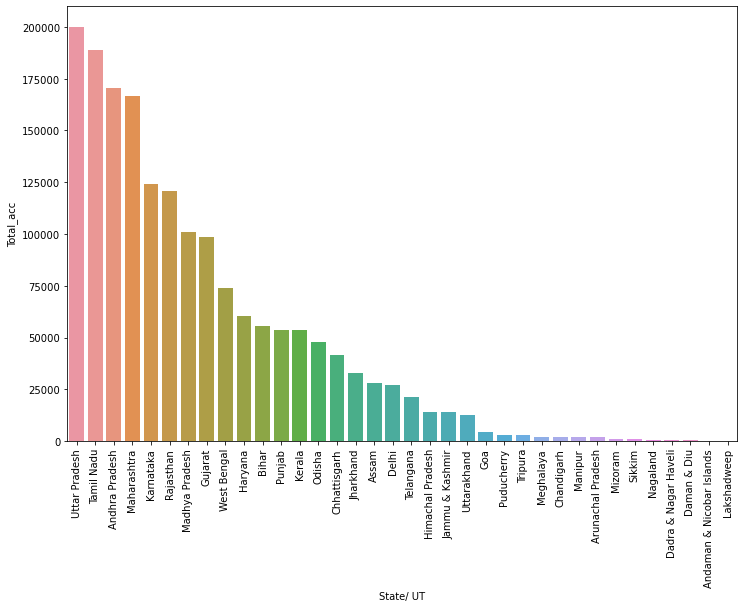

In [141]:
plt.figure(figsize=(12, 8))
df_sorted = df1.sort_values('Total_acc', ascending=False)  # Sort the DataFrame by Total_acc column
sns.barplot(x='State/ UT', y='Total_acc', data=df_sorted)
plt.xticks(rotation=90);


## from above graph it can be seen that Uttar pradesh has maximum accident between 2003 to 2016 followed by tamilnadu, andhra pradesh and maharastra

## After observing that from 2003 to 2016 UP, Andhra Pradesh, Tamil Nadu and Maharashtra has maximum accident lets break this analysis to see which State/Ut has maximum accidents year on year 

## On Ploting graph for each State/Ut for each year it can be observed that UP and Andhra has Topped most of the years in count of accidents

### Use Scroll Bar to see all graphs 

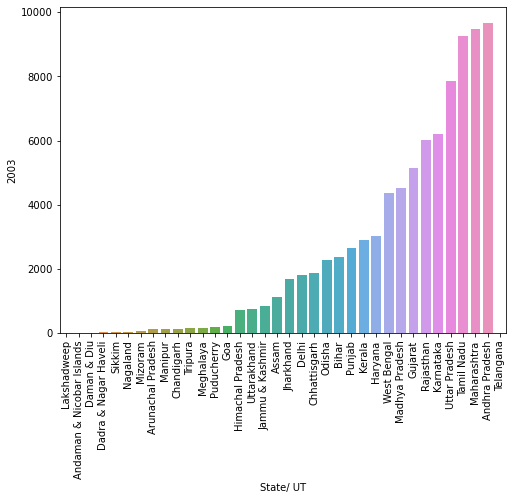

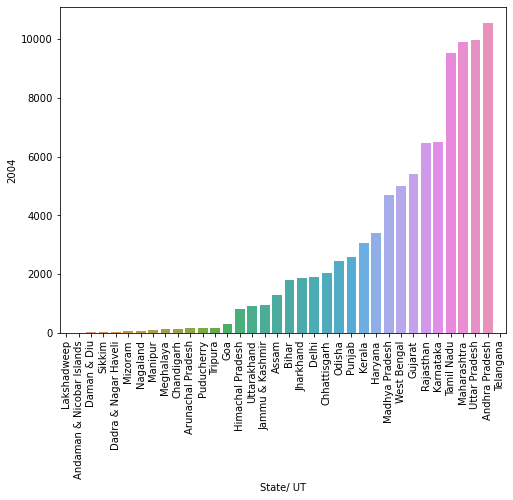

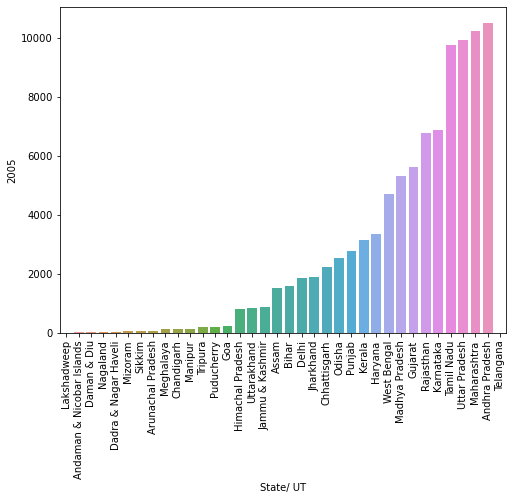

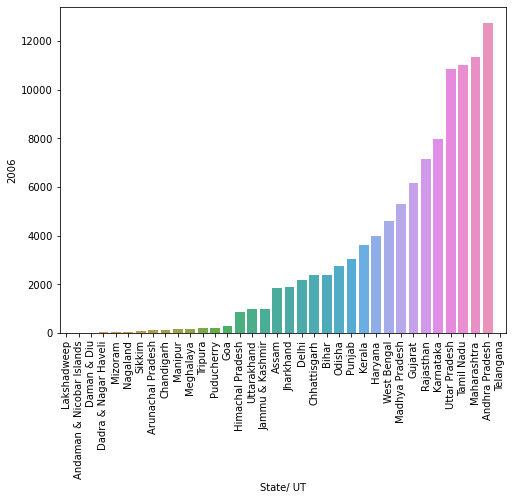

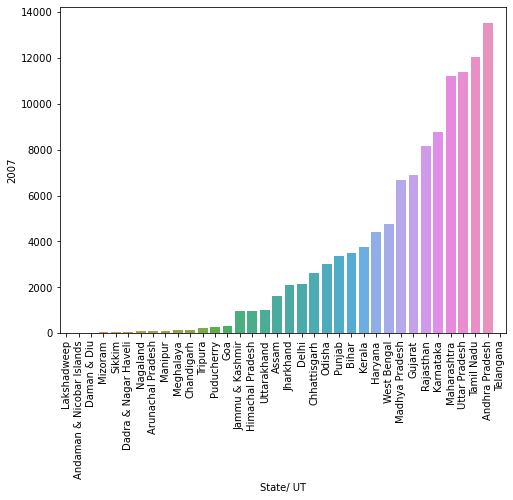

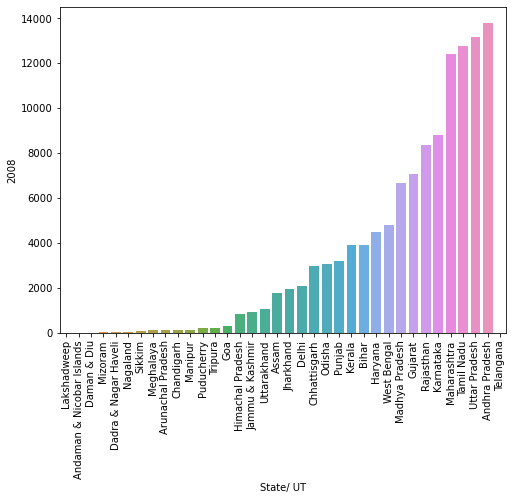

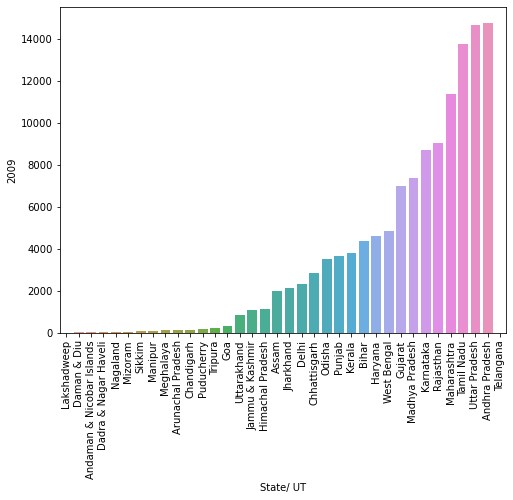

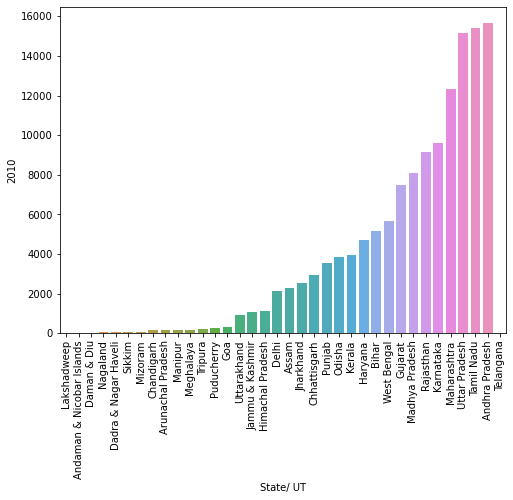

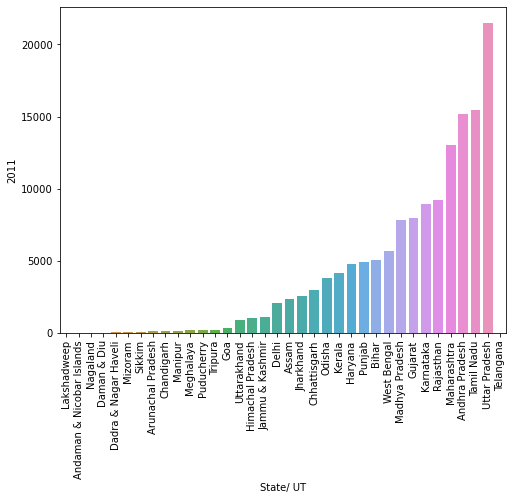

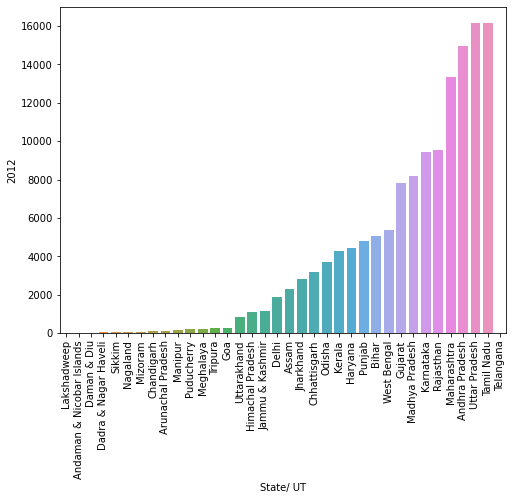

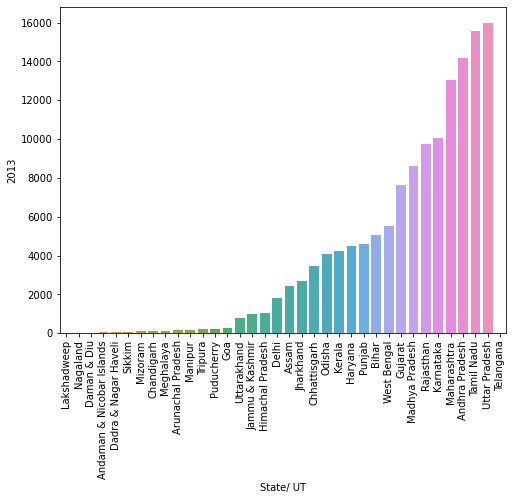

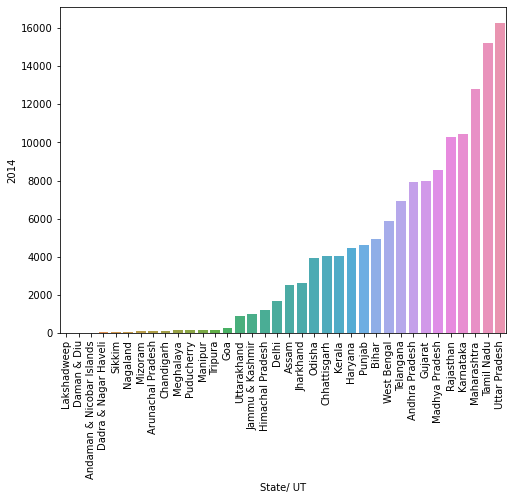

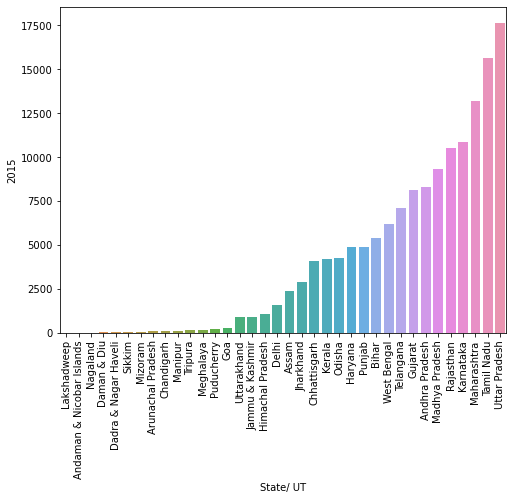

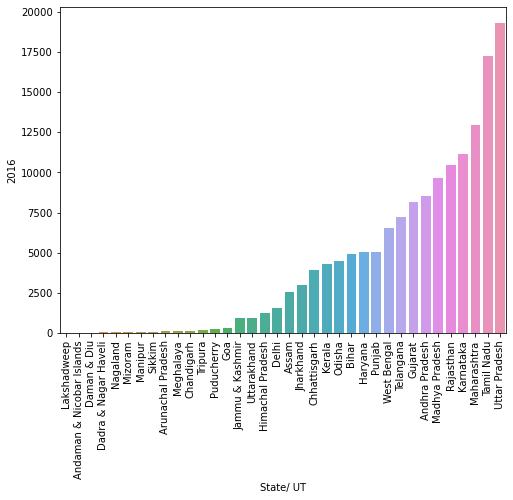

In [142]:
l = ['2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016']
for i in l:
    plt.figure(figsize = (8,6))
    df_sorted = df1.sort_values(i, ascending=True)
    sns.barplot(x = 'State/ UT', y = i, data = df_sorted);
    plt.xticks(rotation = 90);

### Extracting Age, Gender, Accident year info from Gender_Age columns (eg: from this  'Less than 5 years - Male - 2014' to Age = Less than 5 years, Gender = Male, Year = 2014 ) 

In [143]:
road_acc_G['Age'] = road_acc_G['Gender_Age'].str.split('-').str[0]
road_acc_G['Gender'] = road_acc_G['Gender_Age'].str.split('-').str[1]
road_acc_G['Year'] = road_acc_G['Gender_Age'].str.split('-').str[2]
road_acc_G.drop('Gender_Age',axis = 1,inplace = True)
road_acc_G.head()

,State/ UT,No_of_Accident,Age,Gender,Year
0,Andhra Pradesh,0,Less than 5 years,Male,2014
1,Arunachal Pradesh,0,Less than 5 years,Male,2014
2,Assam,15,Less than 5 years,Male,2014
3,Bihar,44,Less than 5 years,Male,2014
4,Chhattisgarh,5,Less than 5 years,Male,2014


### Replacing Few values in Age column for better understanding of data (eg:  '6':'6-9','10':'10-14','15':'15-17','18':'18-20','21':'21-24','25':'25-34','35':'35-44','45':'45-54','55':'55-59')

In [144]:
road_acc_G['Age'] = road_acc_G['Age'].replace({'6':'6-9','10':'10-14','15':'15-17','18':'18-20','21':'21-24','25':'25-34','35':'35-44','45':'45-54','55-64':'55-59'})
road_acc_G['Age'].unique()

array(['Less than 5 years ', '6-9', '10-14', '15-17', '18-20', '21-24',
       '25-34', '35-44', '45-54', '55', '65 and Above ', 'Unknown Age ',
       'Less than 18 years ', '60 and Above ', 'Age not known '],
      dtype=object)

## Extracting Male and Female Seperated from 'Less than 5 years - Male - 2014' and storing into mp1['Gender']

In [145]:
mp1 = df2.melt('State/ UT')
mp1
mp1['Gender'] = mp1['variable'].apply(lambda x:'Male' if 'Male' in x else 'Female')
mp1['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [146]:
mp1.groupby('Gender')['value'].sum()

Gender
Female    340596
Male      240316
Name: value, dtype: int64

## Between 2014 to 2016 Percentage of Male meeting accident is 41% while for Female it is 59% and among all age group people, whose Age were between 25-44 had more count of No of Accident 

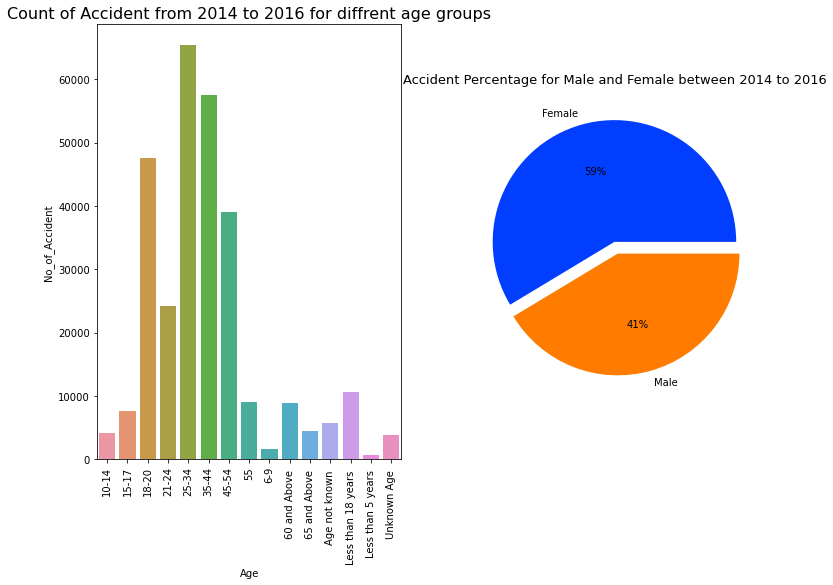

In [147]:
mp2 = mp1.groupby('Gender')['value'].sum().reset_index()
kp = road_acc_G.groupby('Age')['No_of_Accident'].sum().reset_index()
fig = plt.figure(figsize = (12,8))
plt.subplot(1,2,1)
sns.barplot(x = kp['Age'], y = kp['No_of_Accident'])
plt.xticks(rotation = 90)
plt.title('Count of Accident from 2014 to 2016 for diffrent age groups',fontsize = 16);

plt.subplot(1,2,2)
palette_color = sns.color_palette('bright')
explode = [0, 0.1]
plt.pie(mp2['value'], labels=mp2['Gender'],colors=palette_color,explode=explode, autopct='%.0f%%')
plt.title('Accident Percentage for Male and Female between 2014 to 2016', fontsize = 13);

### From Below Stacked bar chart it is evident that UP has maximum number of accident in almost all age group along with UP Andhra Pradesh, Maharastra and TamilNadu also has good numbers in terms of accidents

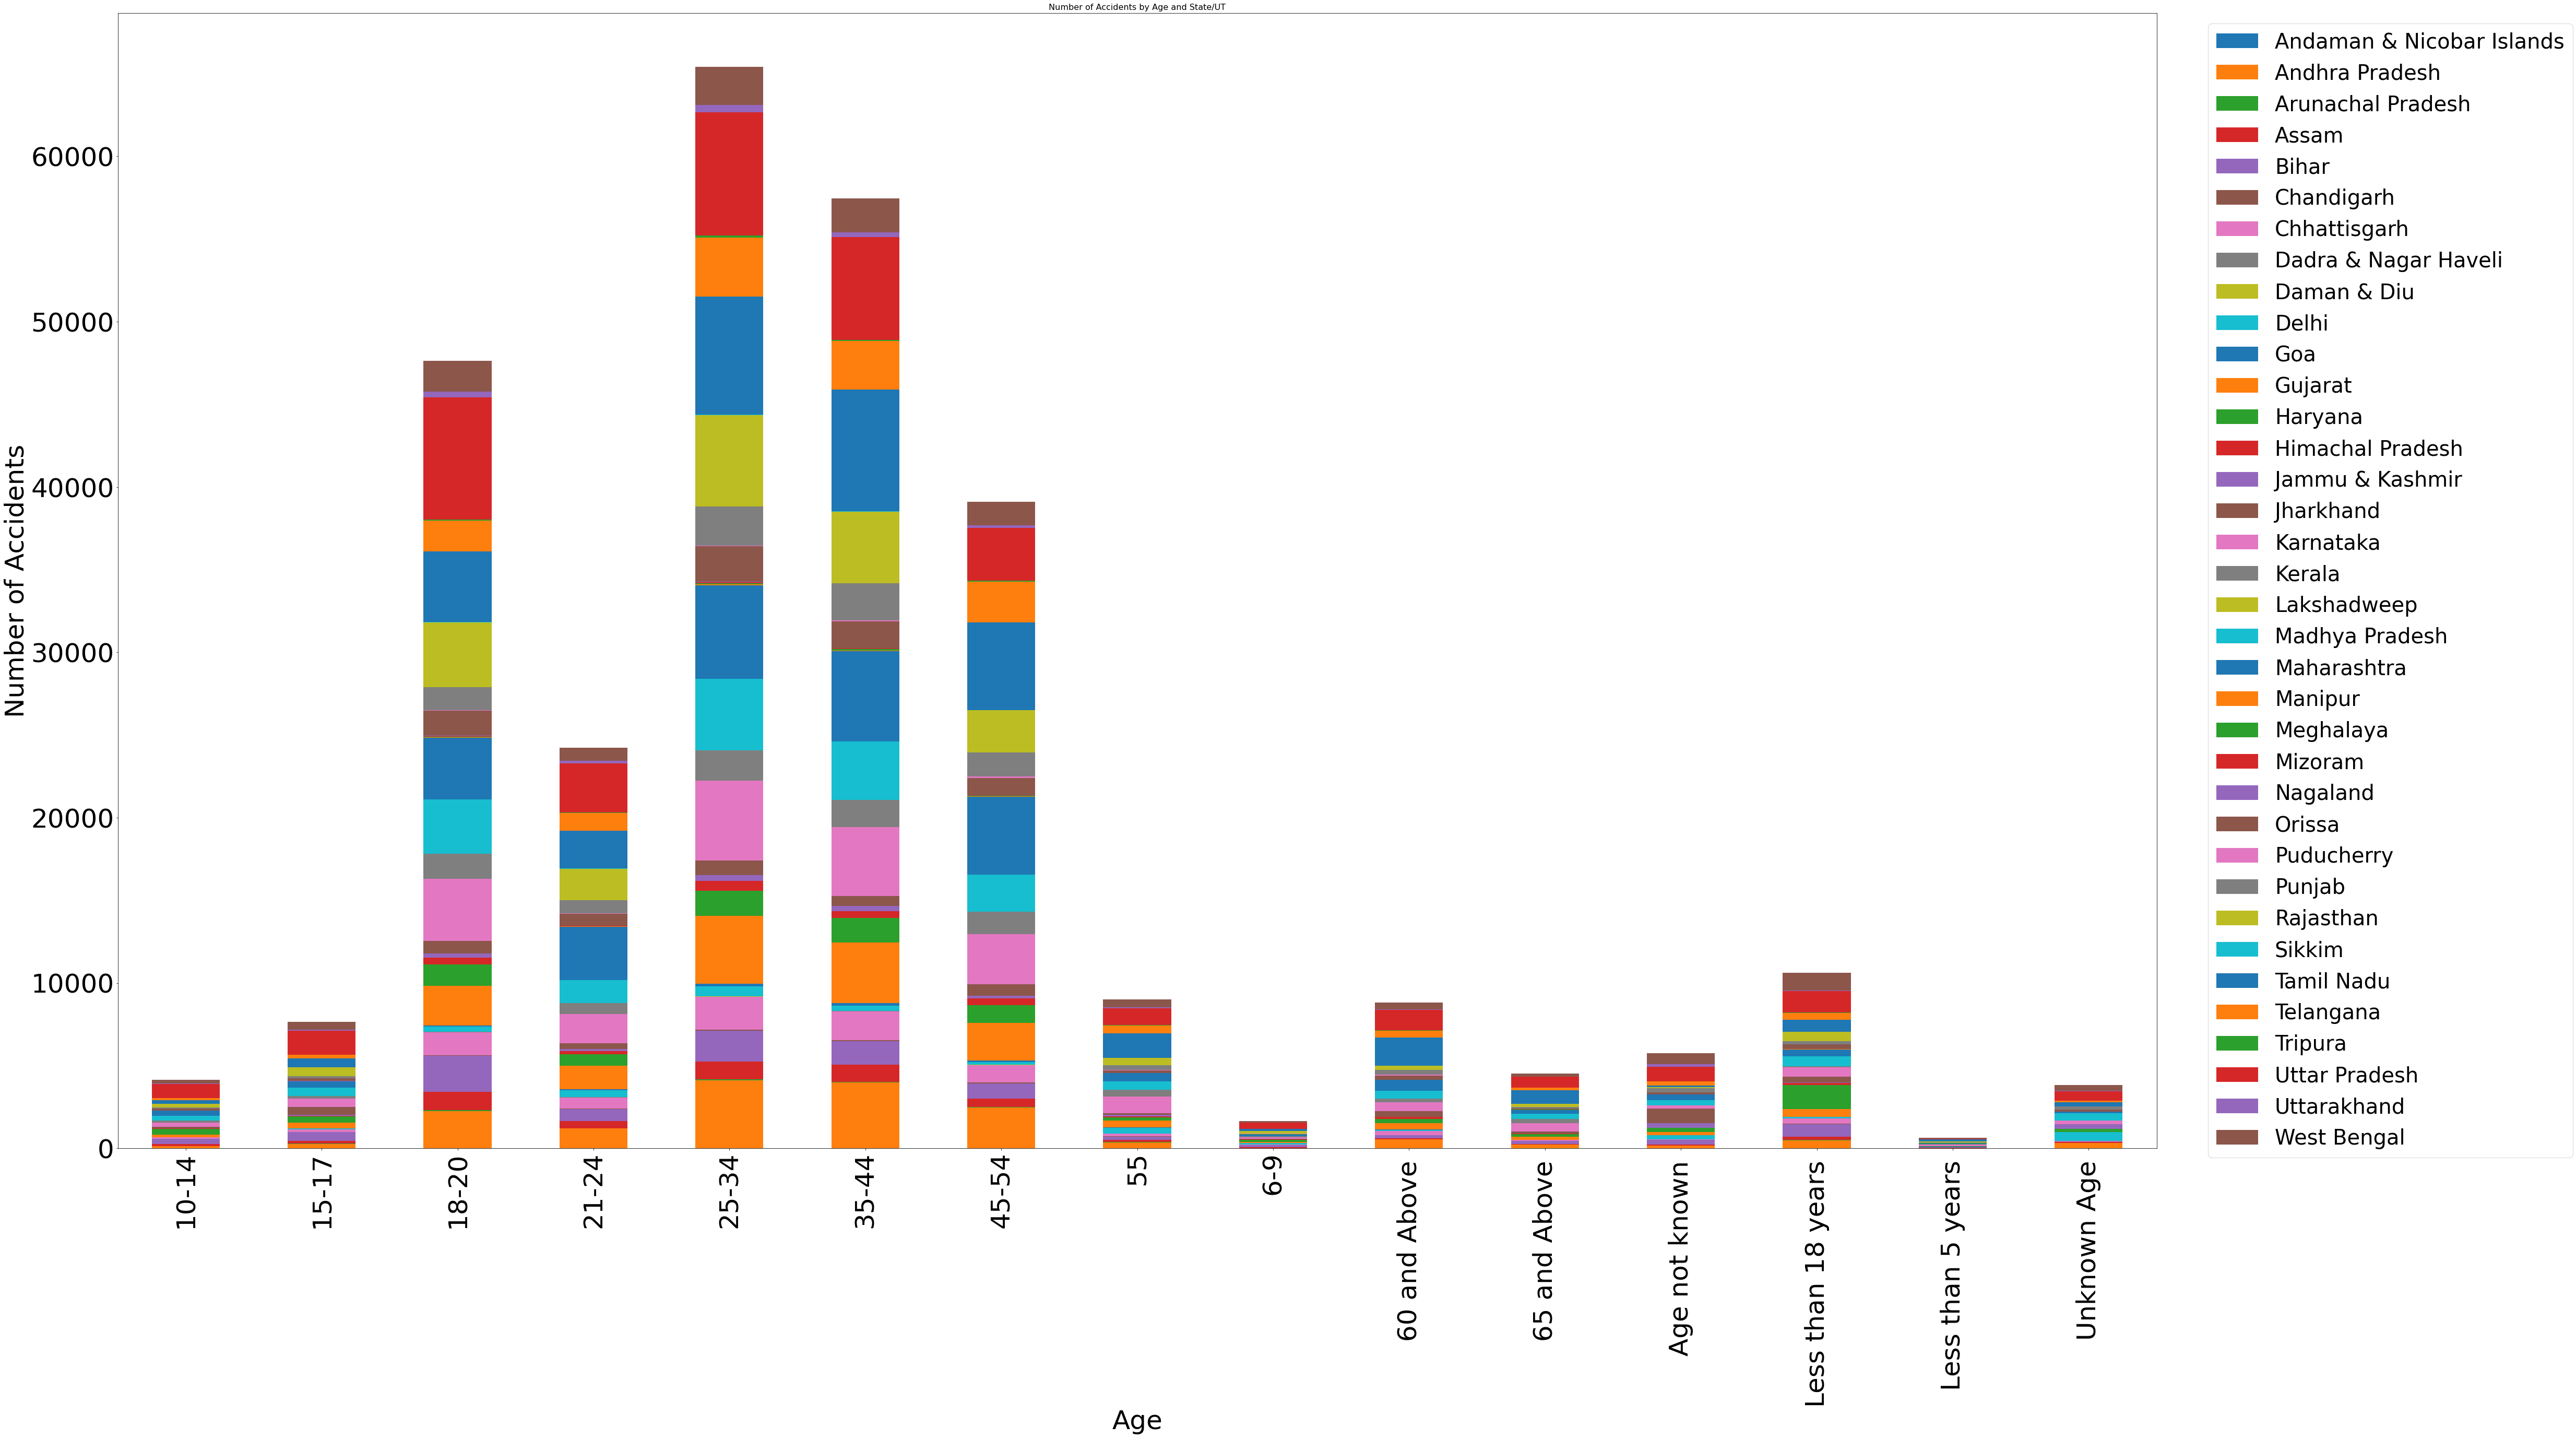

In [148]:
df = road_acc_G.groupby(['State/ UT', 'Age'])['No_of_Accident'].sum().reset_index()

df_pivot = df.pivot(index='Age', columns='State/ UT', values='No_of_Accident')

ax = df_pivot.plot(kind='bar', stacked=True, figsize=(70,40))

# Move the legend outside the chart to the right
ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left',fontsize = 40)

# Set the chart title and axis labels
ax.set_title('Number of Accidents by Age and State/UT', fontsize=16)
ax.set_xlabel('Age', fontsize=50)
ax.set_ylabel('Number of Accidents', fontsize=50)

# Increase the font size of the tick labels
ax.tick_params(axis='both', which='major', labelsize=50)

# Show the chart
plt.show()

### Lets Check No of Accident each year for Every State and UT to analyse their performance in road saftey over the years 
### There has been significant Reduction in No of Accidents in North East states of india , except Assam every North East State has shown Significant fall in number of Accidents 
### Apart from North East Region there are few other States and UT where there was fall in No. of Accidents Eg. Delhi, J&K, Andaman & Nicobar and surprisingly Andhra Pradesh 
### Use Scroll Bar to see graph of all regions 

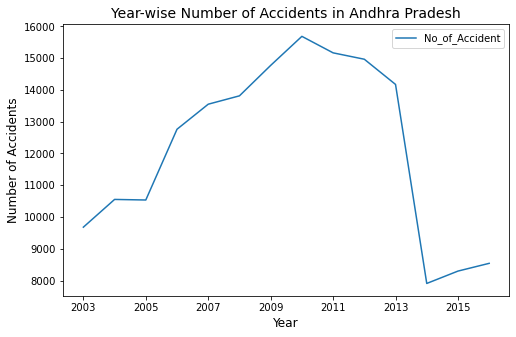

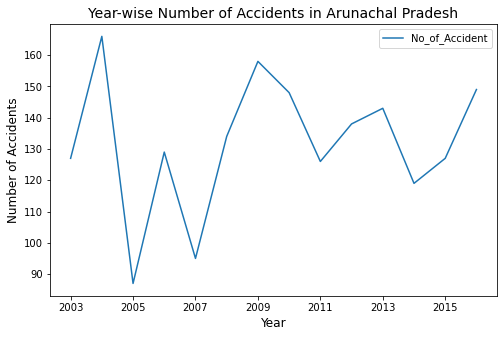

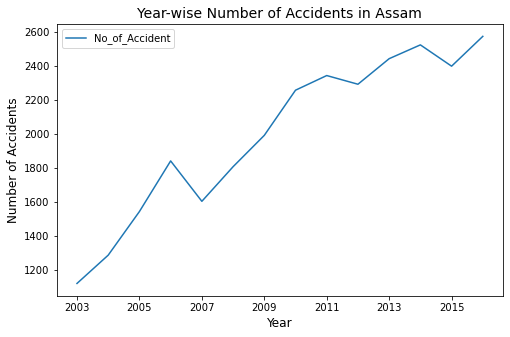

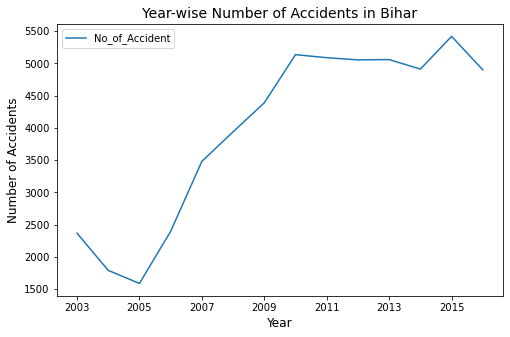

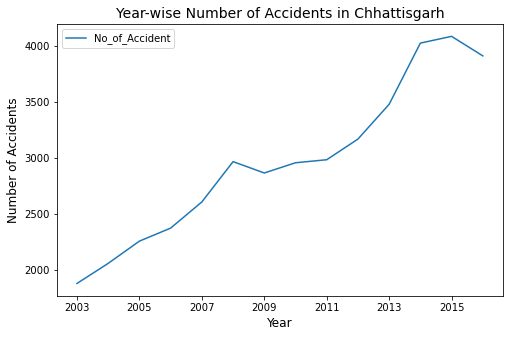

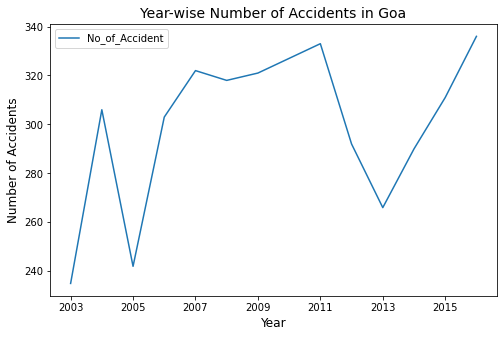

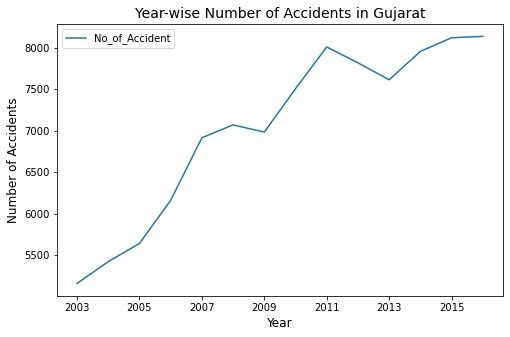

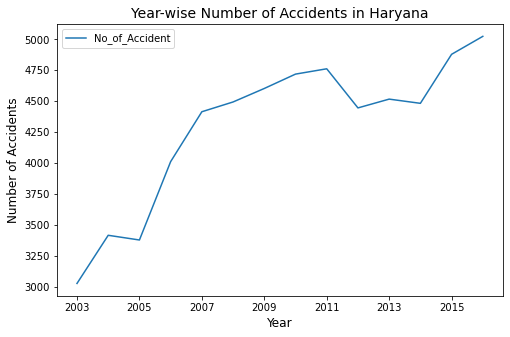

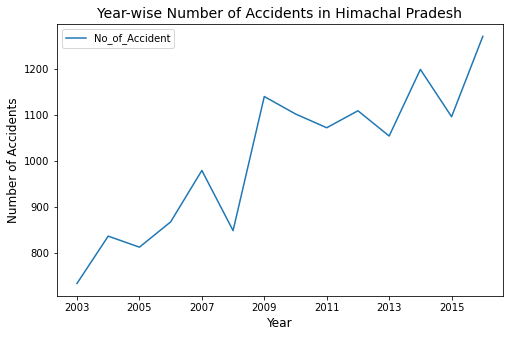

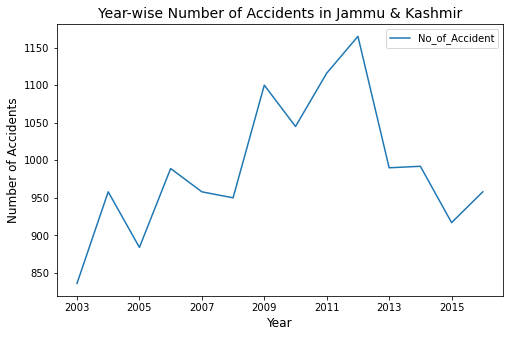

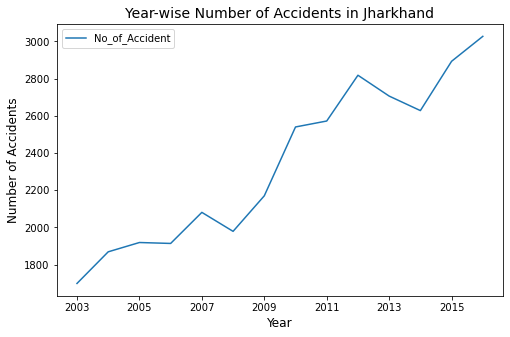

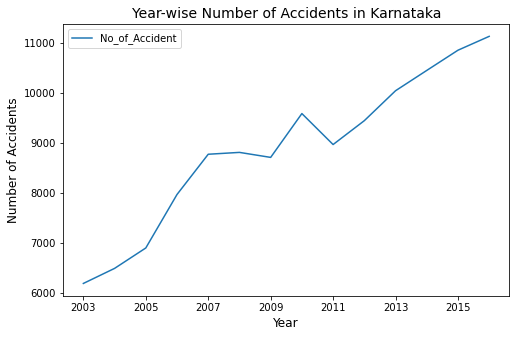

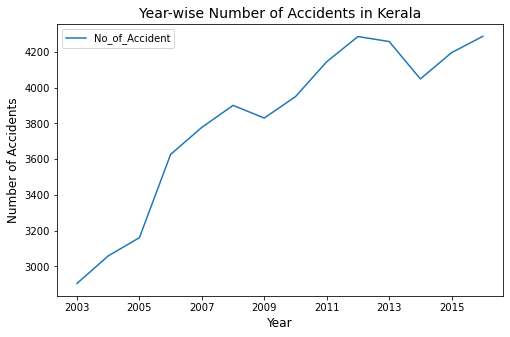

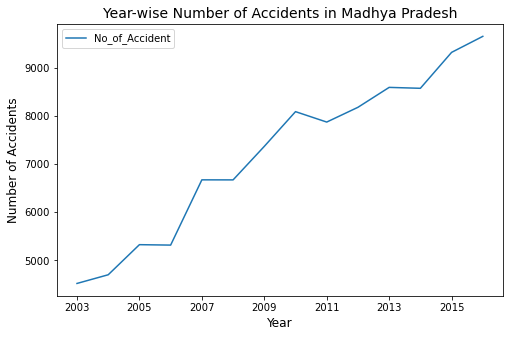

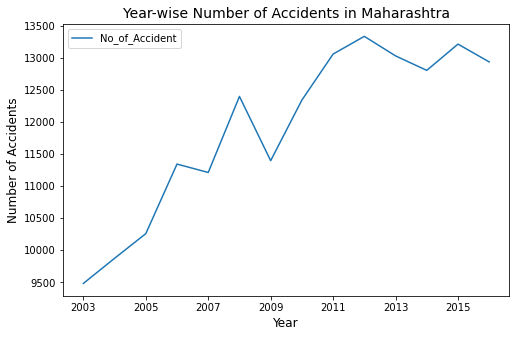

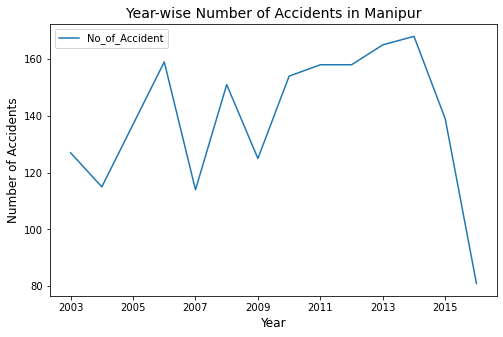

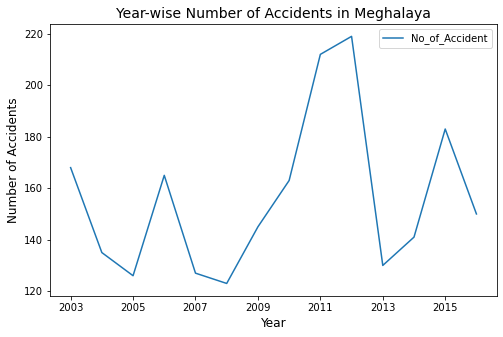

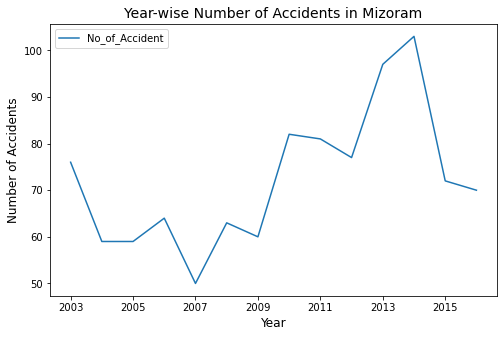

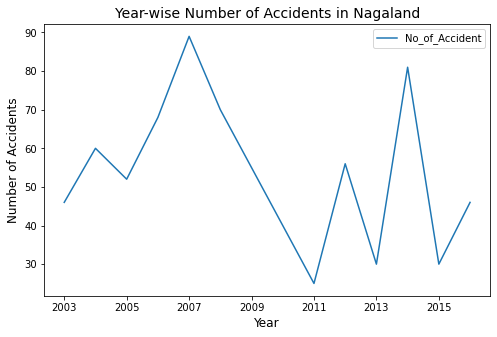

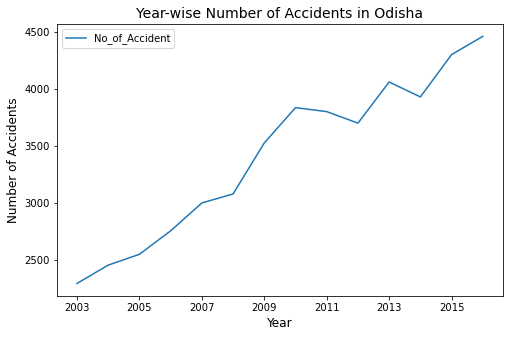

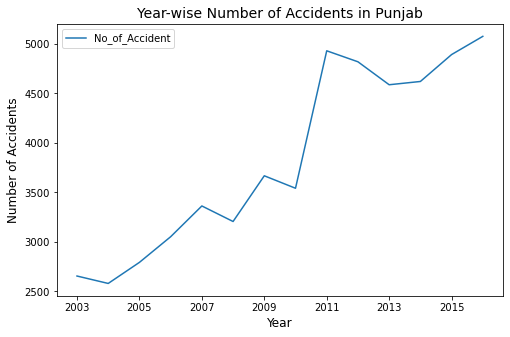

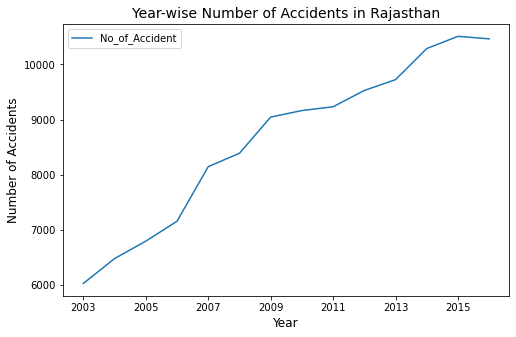

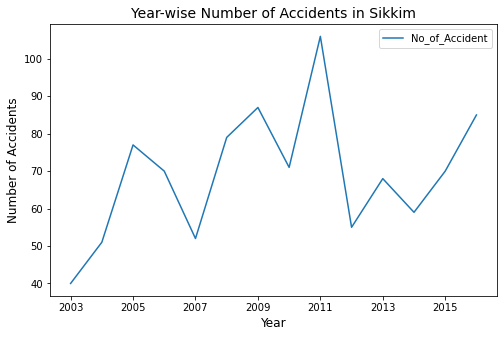

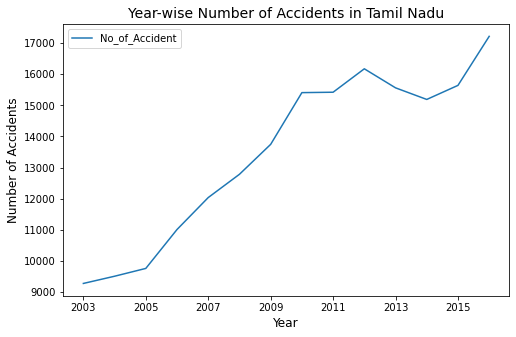

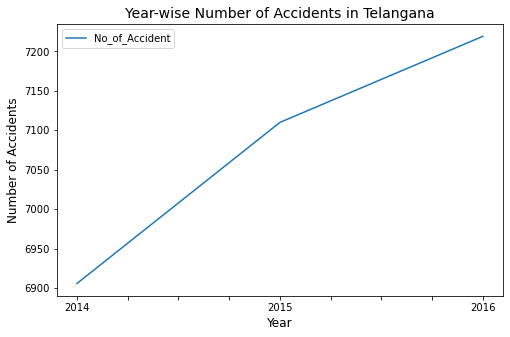

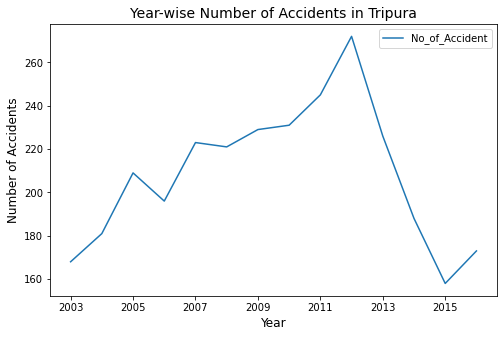

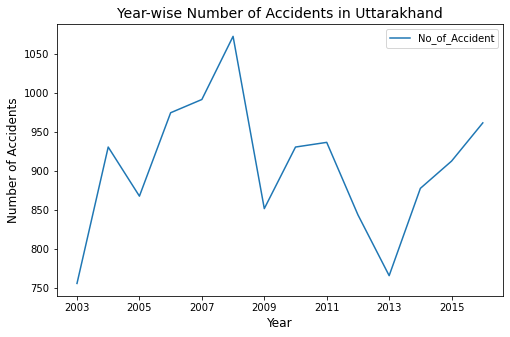

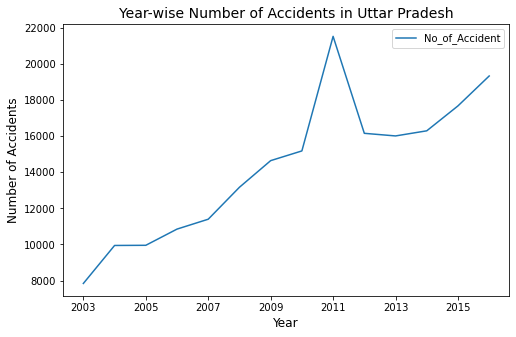

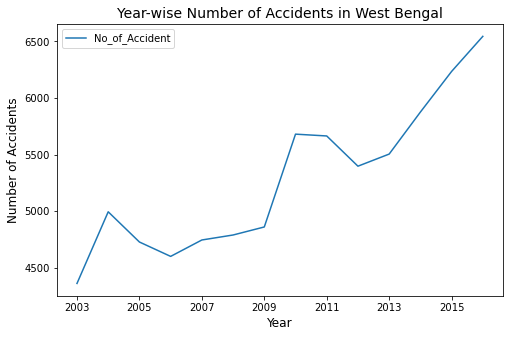

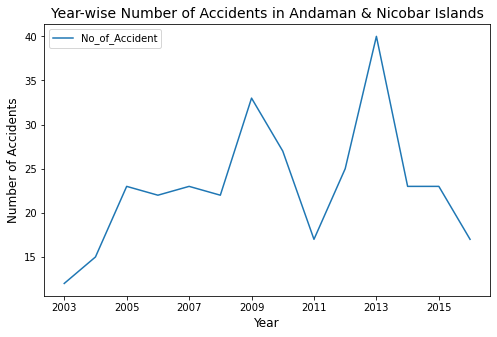

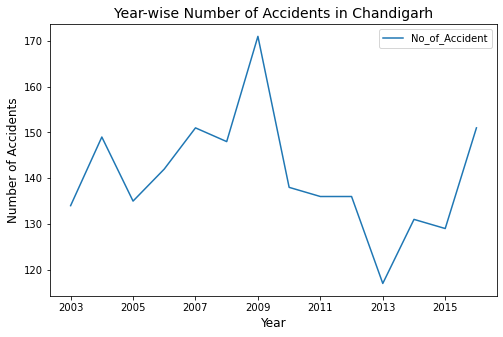

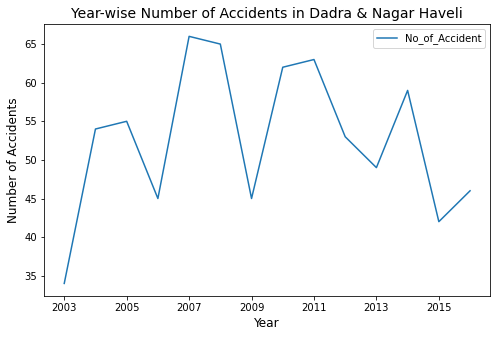

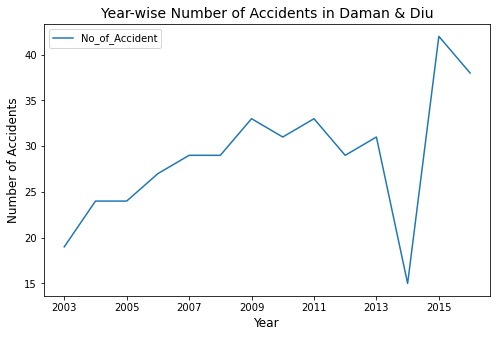

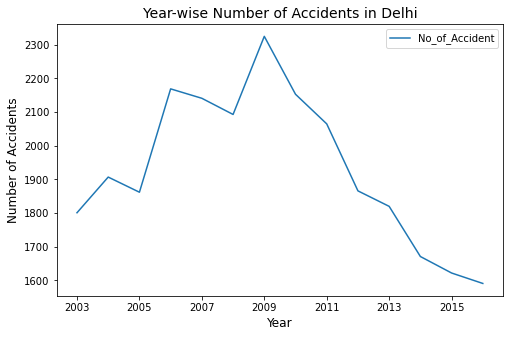

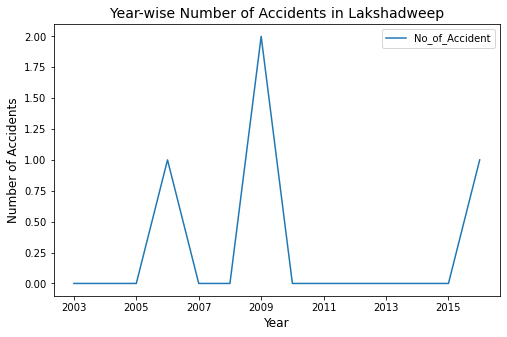

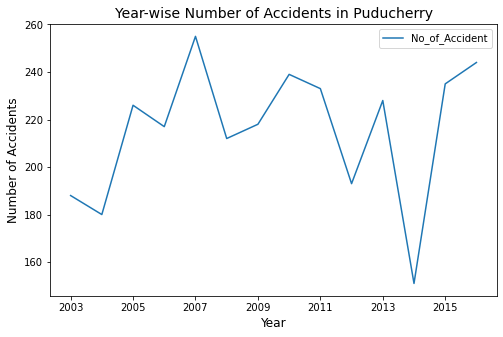

In [149]:
states = road_acc['State/ UT'].unique()

# Loop through the unique values of the "State/ UT" column and create a separate chart for each one
for state in states:
    # Create a new DataFrame for the current state
    df_state = road_acc[road_acc['State/ UT'] == state]
    
    # Create a line chart for the current state with years on the x-axis and the number of accidents on the y-axis
    ax = df_state.plot(kind='line', x='Year', y='No_of_Accident', figsize=(8,5))
    
    # Set the chart title and axis labels
    ax.set_title(f'Year-wise Number of Accidents in {state}', fontsize=14)
    ax.set_xlabel('Year', fontsize=12)
    ax.set_ylabel('Number of Accidents', fontsize=12)
    
    # Show the chart
    plt.show()

## Lets Explore third dataset to see people behavior towards their own saftey eg- Wearing Helmet or wearing seat belt

In [150]:
df3.drop(['Unnamed: 7','Unnamed: 8','Total_acc','Non-wearing of Helmet - Total','Non-wearing of seat belt - Total'], axis =1, inplace = True)
df3.head()

,State/ UT,Non-wearing of Helmet - Male,Non-wearing of Helmet - Female,Non-wearing of seat belt - Male,Non-wearing of seat belt - Female
0,Andhra Pradesh,459,18,222,15
1,Arunachal Pradesh,10,4,0,0
2,Assam,0,0,0,0
3,Bihar,0,0,0,0
4,Chhattisgarh,89,7,6,0


In [151]:
road_acc_R = df3.melt('State/ UT')
road_acc_R.head()

,State/ UT,variable,value
0,Andhra Pradesh,Non-wearing of Helmet - Male,459
1,Arunachal Pradesh,Non-wearing of Helmet - Male,10
2,Assam,Non-wearing of Helmet - Male,0
3,Bihar,Non-wearing of Helmet - Male,0
4,Chhattisgarh,Non-wearing of Helmet - Male,89


### Males are more likely to ignore wearing saftey Equipments 
### Not Wearing Helment has been the major cause for accidents

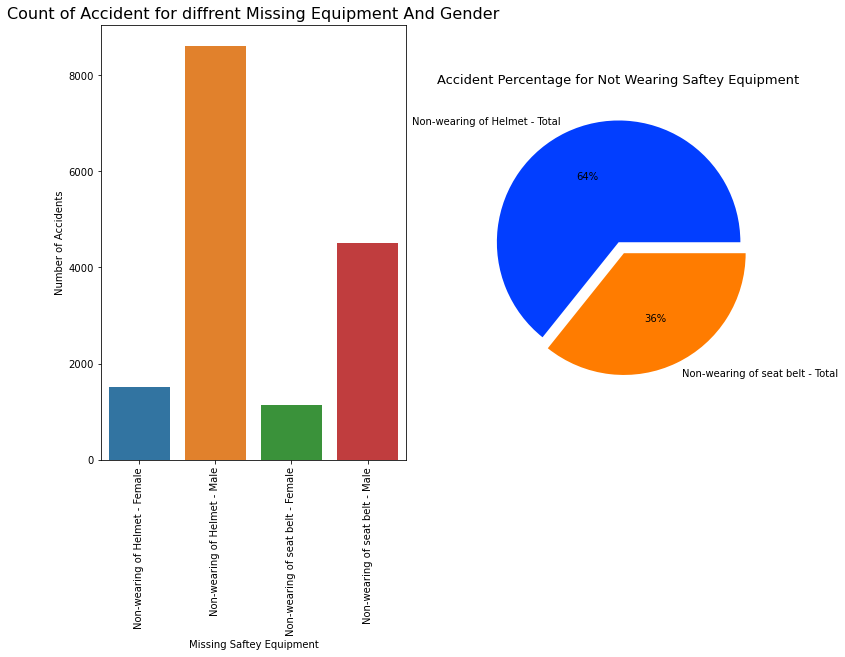

In [152]:
ap1 = road_acc_R.groupby('variable')['value'].sum().reset_index()
ap1.rename({'variable':'Missing Saftey Equipment','value':'Number of Accidents'}, axis =1, inplace = True)
road_acc_R['Gender'] = road_acc_R['variable'].apply(lambda x:'Male' if 'Male' in x else 'Female')
df5 = df4[['Non-wearing of Helmet - Total','Non-wearing of seat belt - Total']].sum().reset_index()
fig = plt.figure(figsize = (12,8))
plt.subplot(1,2,1)
sns.barplot(x = ap1['Missing Saftey Equipment'], y = ap1['Number of Accidents'])
plt.xticks(rotation = 90)
plt.title('Count of Accident for diffrent Missing Equipment And Gender',fontsize = 16);

plt.subplot(1,2,2)
palette_color = sns.color_palette('bright')
explode = [0, 0.1]
plt.pie(df5[0], labels=df5['index'],colors=palette_color,explode=explode, autopct='%.0f%%')
plt.title('Accident Percentage for Not Wearing Saftey Equipment', fontsize = 13);

## Ploting 3 graphs 
1. States VS Count of Accident for not wearing Helmet 
2. States VS Count of Accident for not wearing Seat Belt
3. States vs total no of accident for year 2016 

Insight 


in Third Graph is at 15th place which means it has very less number of accidents but in first and second graph Kerala is at 4th position which indicates that whatever number of accident taking place in karela most of them are due to negligence of saftey equipments

df4 = pd.read_csv('Persons_killed_due_to_Non-use_of_Safety_Device_2016.csv')
df_sorted1 = df4.sort_values('Non-wearing of Helmet - Total', ascending=True)
df_sorted2 = df4.sort_values('Non-wearing of seat belt - Total', ascending=False)
fig = plt.figure(figsize = (20,8))
plt.subplot(2,2,1)
sns.barplot(x = 'State/ UT',y = 'Non-wearing of Helmet - Total', data = df_sorted1)
plt.xticks(rotation = 90)
plt.title('Count of Accident State/UT wise in 2016 for Non-wearing of Helmet',fontsize = 13);

plt.subplot(2,2,2)
sns.barplot(x = 'State/ UT',y = 'Non-wearing of seat belt - Total', data = df_sorted2)
plt.xticks(rotation = 90);
plt.title('Count of Accident State/UT wise in 2016 for Non-wearing of seat belt', fontsize = 13);

fig.tight_layout(pad=5.0)
plt.subplot(2,1,2)
plt.subplots_adjust(bottom=0.01, right=0.8, top=0.9)
sns.barplot(x = 'State/ UT', y = '2016', data = df_sorted)
plt.title('Count of Accident State/UT wise for Year 2016', fontsize = 13);
plt.xticks(rotation = 90);

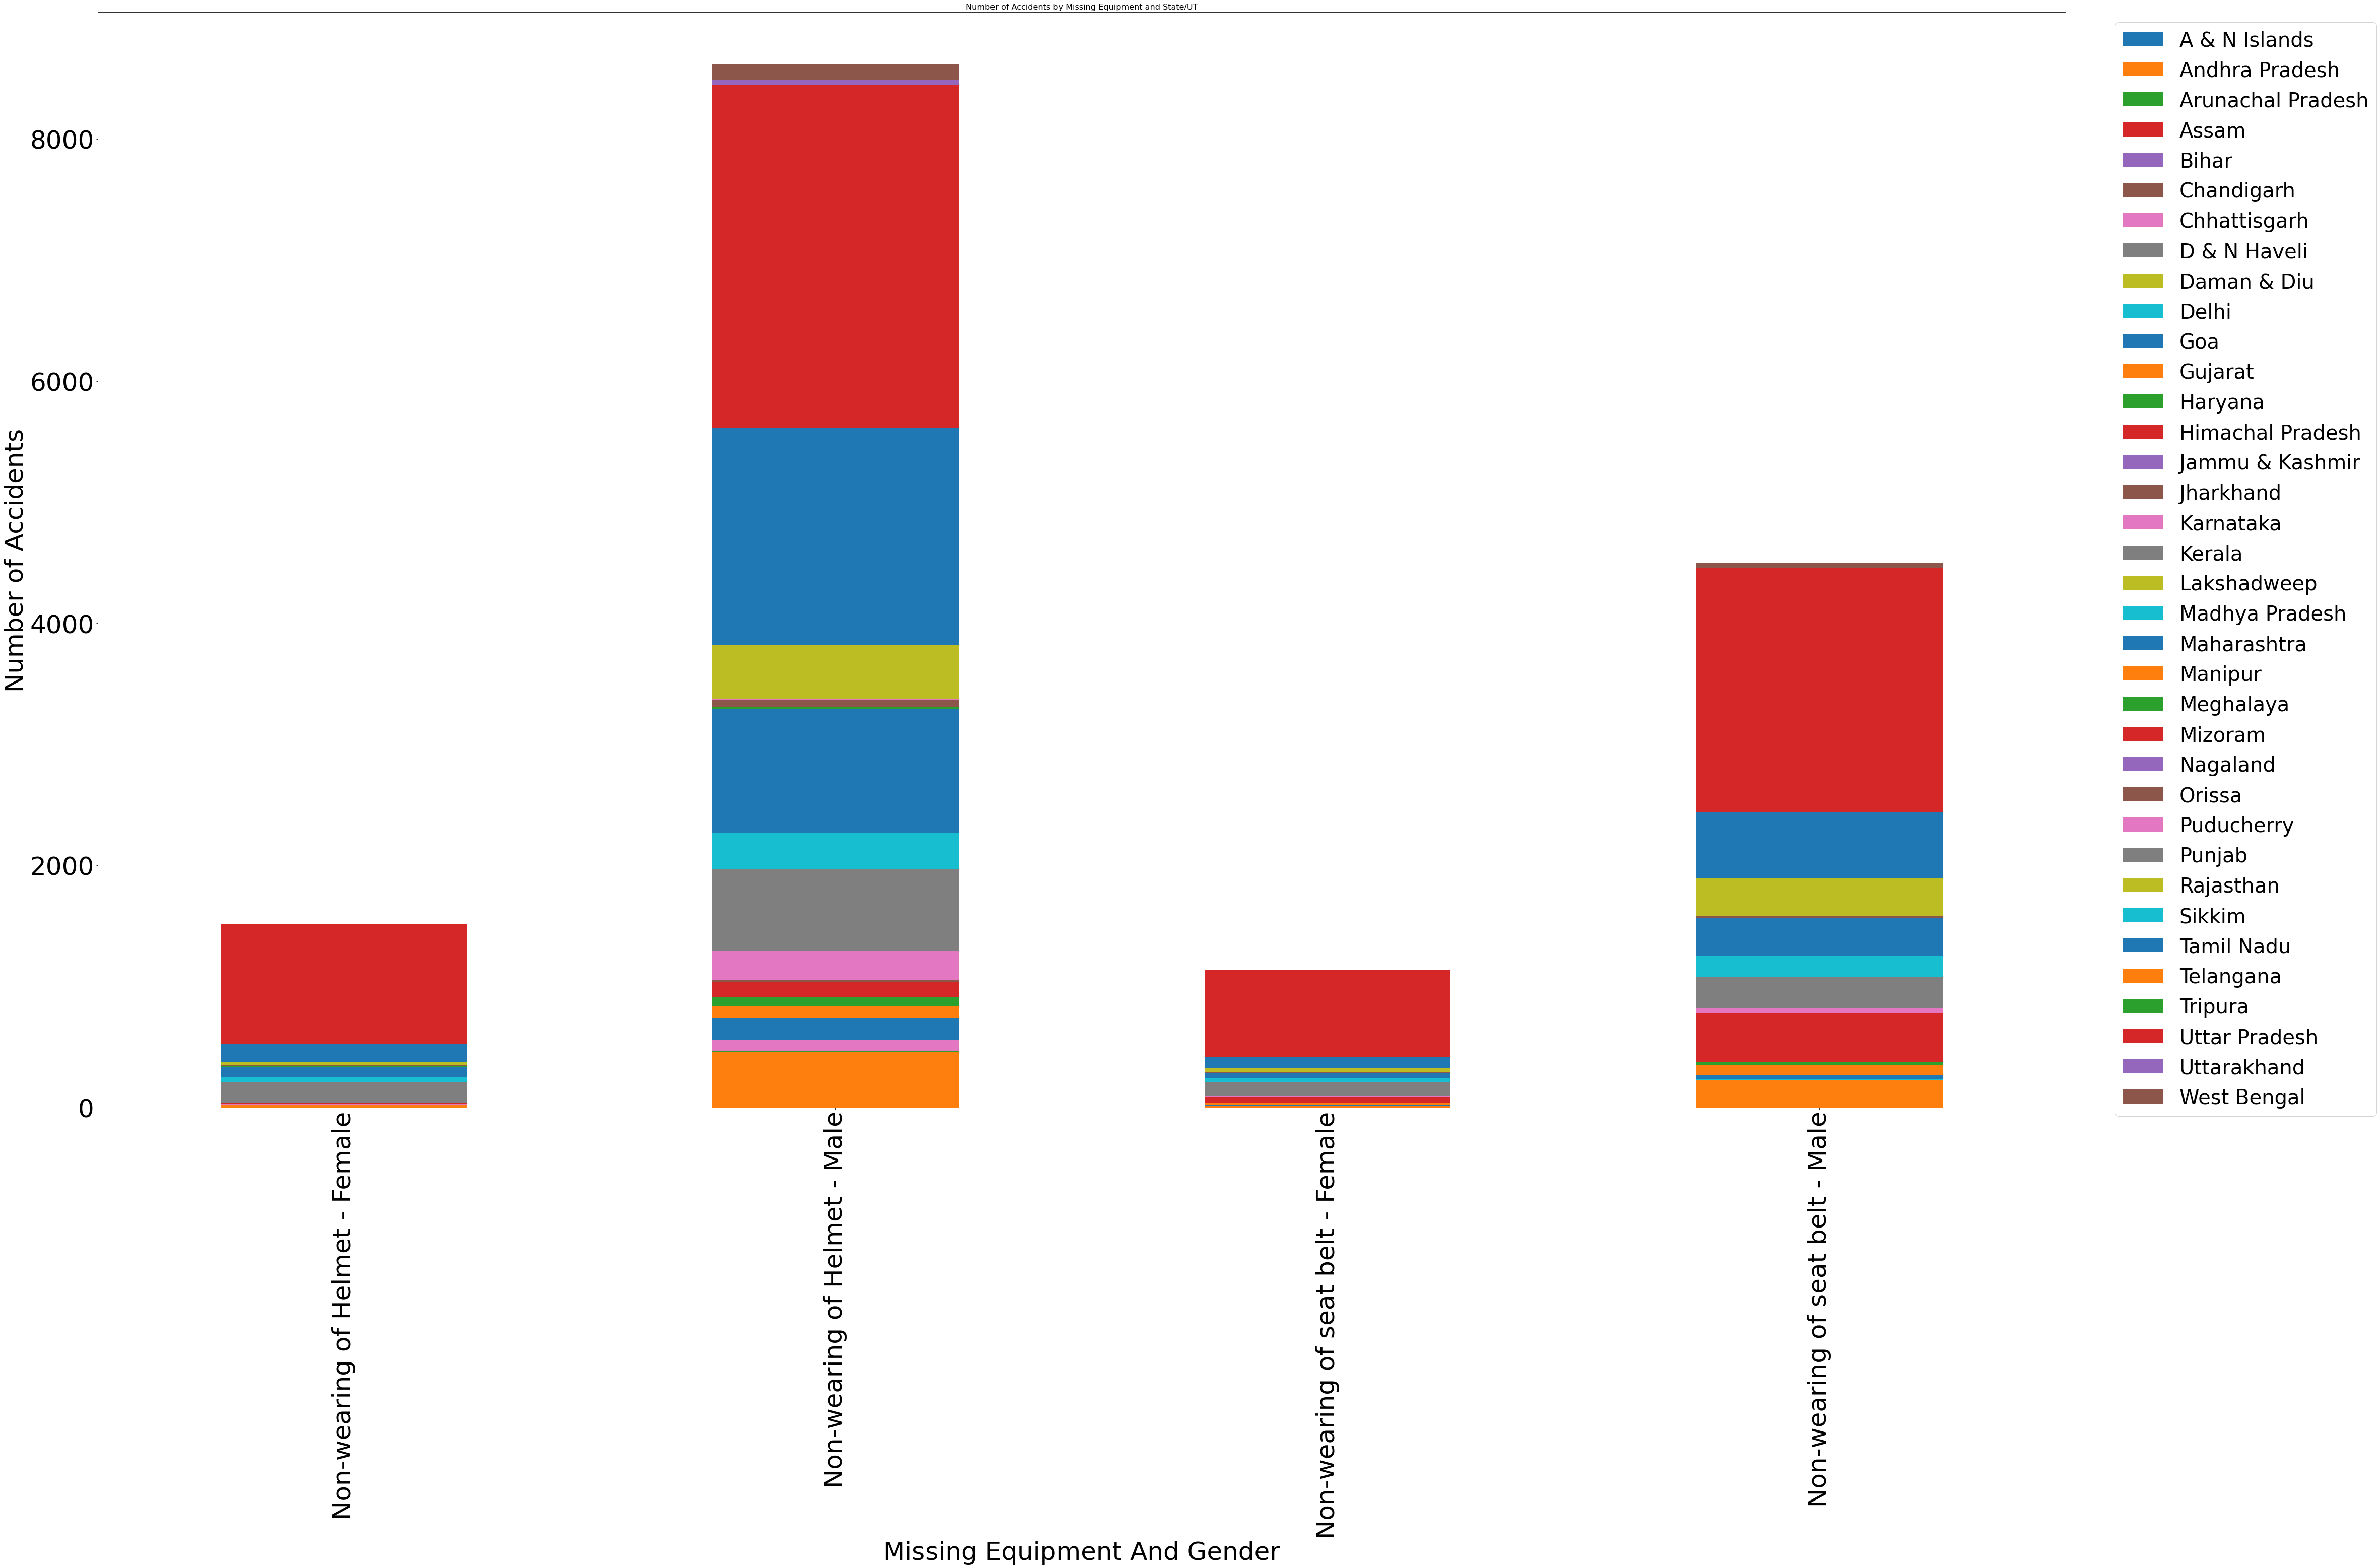

In [153]:
df1 = road_acc_R.groupby(['State/ UT', 'variable'])['value'].sum().reset_index()

df_pivot1 = df1.pivot(index='variable', columns='State/ UT', values='value')

ax = df_pivot1.plot(kind='bar', stacked=True, figsize=(70,40))

# Move the legend outside the chart to the right
ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left',fontsize = 40)

# Set the chart title and axis labels
ax.set_title('Number of Accidents by Missing Equipment and State/UT', fontsize=16)
ax.set_xlabel('Missing Equipment And Gender', fontsize=50)
ax.set_ylabel('Number of Accidents', fontsize=50)

# Increase the font size of the tick labels
ax.tick_params(axis='both', which='major', labelsize=50)

# Show the chart
plt.show()

# Findings

Q1. which part of india has witnessed more number of accidents between 2003 to 2016 ?

ans - Uttar pradesh has maximum accident between 2003 to 2016 followed by Tamilnadu, Andhra Pradesh and Maharastra ? 

Q2.  Which States has shown Dip in no of accident per year ? 

ans - There has been significant Reduction in No of Accidents in North East states of india , except Assam every North East State has shown Significant fall in number of Accidents 
Apart from North East Region there are few other States and UT where there was fall in No. of Accidents Eg. Delhi, J&K, Andaman & Nicobar and surprisingly Andhra Pradesh.

Q3. Which age group and Gender had been among who had met with accident ?

ans - Percentage of Male meeting accident is 41% while for Female it is 59% and among all age group people, whose Age were     between  25-44 had more count of No of Accident 

Q4. More Accidents are due to non wearing of helmet or due to non wearing of Seat Belt ?

ans - Not Wearing Helment has been the major cause for accidents as 64% of total accidents which took place in 2016 were due to       non wearing of Helmet.

In [ ]:
# Recommendations 